In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
dir = os.getcwd()
bsi = pd.read_csv(dir+'/data/bsi.csv')

In [4]:
bsi.columns

Index(['통계표', '업종코드', 'BSI코드', '단위', '변환', '2003/01', '2003/02', '2003/03',
       '2003/04', '2003/05',
       ...
       '2024/10', '2024/11', '2024/12', '2025/01', '2025/02', '2025/03',
       '2025/04', '2025/05', '2025/06', '2025/07'],
      dtype='object', length=276)

In [5]:
drops = ['통계표', '업종코드', 'BSI코드', '단위', '변환']
bsi.drop(columns=drops, inplace=True)
bsi = bsi.T

In [6]:
bsi

,0,1,2,3,4,5,6,7,8,9
2003/01,104.2,91.0,96.0,97.0,121.0,101.3,97.0,97.0,95.0,119.0
2003/02,99.5,91.0,93.0,95.0,131.0,98.1,94.0,96.0,94.0,126.0
2003/03,94.9,87.0,92.0,90.0,143.0,94.9,90.0,95.0,90.0,137.0
2003/04,98.6,92.0,92.0,89.0,130.0,101.7,96.0,95.0,86.0,118.0
2003/05,93.8,84.0,89.0,88.0,119.0,89.9,79.0,84.0,88.0,110.0
...,...,...,...,...,...,...,...,...,...,...
2025/03,91.9,87.0,82.0,90.0,123.0,97.6,94.0,93.0,93.0,119.0
2025/04,93.1,85.0,84.0,91.0,124.0,96.7,94.0,90.0,94.0,120.0
2025/05,94.7,85.0,85.0,93.0,114.0,97.4,91.0,89.0,94.0,113.0
2025/06,94.4,83.0,84.0,92.0,111.0,99.1,92.0,90.0,93.0,107.0


In [7]:
#manu: 제조업/ ex: 수출기업
#cbsi: 기업심리지수 / ex: 수출실적 / op: 가동률실적 / inv: 설비투자실적 / raw: 원자재구매실적
cols = ['manu_cbsi', 'manu_ex', 'manu_op', 'manu_inv', 'manu_raw', 'ex_cbsi', 'ex_ex', 'ex_op', 'ex_inv', 'ex_raw']
bsi.columns = cols

In [10]:
bsi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 2003/01 to 2025/07
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manu_cbsi  271 non-null    float64
 1   manu_ex    271 non-null    float64
 2   manu_op    271 non-null    float64
 3   manu_inv   271 non-null    float64
 4   manu_raw   271 non-null    float64
 5   ex_cbsi    271 non-null    float64
 6   ex_ex      271 non-null    float64
 7   ex_op      271 non-null    float64
 8   ex_inv     271 non-null    float64
 9   ex_raw     271 non-null    float64
dtypes: float64(10)
memory usage: 23.3+ KB


In [11]:
ipi = pd.read_csv(dir+'/data/ipi_cbsi.csv')
ipi['dates'] = ipi['Unnamed: 0']
ipi.set_index('dates', inplace=True) #전산업생산지수 데이터 불러오기
ipi.head()

,Unnamed: 0,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
dates,,,,,,,,,,,,,
2003/02,2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
2003/03,2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2003/04,2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
2003/05,2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
2003/06,2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9


In [12]:
ipi.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
ipi = ipi['ipi']

In [15]:
ipi

dates
2003/02     61.7
2003/03     62.3
2003/04     62.4
2003/05     62.4
2003/06     63.3
           ...  
2025/02    113.4
2025/03    114.6
2025/04    113.8
2025/05    112.5
2025/06    113.8
Name: ipi, Length: 269, dtype: float64

In [19]:
temp = bsi.join(ipi, how='right')

In [20]:
temp

,manu_cbsi,manu_ex,manu_op,manu_inv,manu_raw,ex_cbsi,ex_ex,ex_op,ex_inv,ex_raw,ipi
dates,,,,,,,,,,,
2003/02,99.5,91.0,93.0,95.0,131.0,98.1,94.0,96.0,94.0,126.0,61.7
2003/03,94.9,87.0,92.0,90.0,143.0,94.9,90.0,95.0,90.0,137.0,62.3
2003/04,98.6,92.0,92.0,89.0,130.0,101.7,96.0,95.0,86.0,118.0,62.4
2003/05,93.8,84.0,89.0,88.0,119.0,89.9,79.0,84.0,88.0,110.0,62.4
2003/06,87.9,83.0,86.0,91.0,116.0,85.0,82.0,85.0,91.0,110.0,63.3
...,...,...,...,...,...,...,...,...,...,...,...
2025/02,90.1,87.0,80.0,89.0,124.0,95.5,93.0,90.0,90.0,118.0,113.4
2025/03,91.9,87.0,82.0,90.0,123.0,97.6,94.0,93.0,93.0,119.0,114.6
2025/04,93.1,85.0,84.0,91.0,124.0,96.7,94.0,90.0,94.0,120.0,113.8


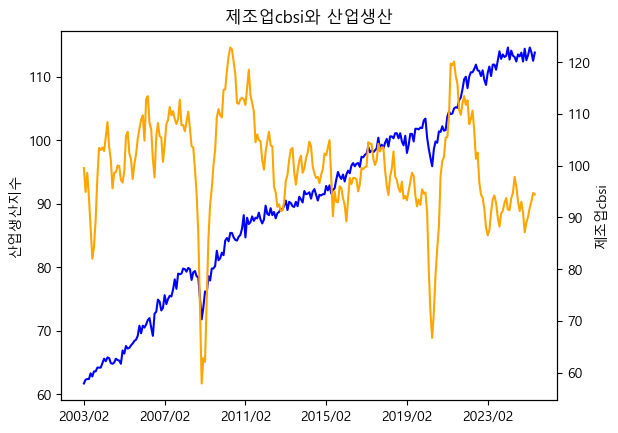

In [22]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = temp.index
y1 = temp['ipi']
y2 = temp['manu_cbsi']

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.plot(x, y2, color='orange', label='y2')
ax2.set_ylabel('제조업cbsi', color='black')
plt.xticks(x[::48])
plt.title('제조업cbsi와 산업생산')
plt.show()

In [23]:
l = ['manu_cbsi', 'manu_ex', 'manu_op', 'manu_inv', 'manu_raw', 'ex_cbsi', 'ex_ex', 'ex_op', 'ex_inv', 'ex_raw']
for a in l:
    mu = temp[a].mean()
    std = temp[a].std()
    temp[a + '_z'] = (temp[a] - mu) / std


In [31]:
mu = temp['ipi'].mean()
std = temp['ipi'].std()
temp['ipi' + '_z'] = (temp['ipi'] - mu) / std

In [32]:
l2 = []
for a in l:
    b = a + '_z'
    l2.append(b)

In [33]:
l2.append('ipi_z')

In [34]:
temp[l2].corr()

,manu_cbsi_z,manu_ex_z,manu_op_z,manu_inv_z,manu_raw_z,ex_cbsi_z,ex_ex_z,ex_op_z,ex_inv_z,ex_raw_z,ipi_z
manu_cbsi_z,1.000000,0.879311,0.959315,0.896680,0.468377,0.939898,0.865987,0.915481,0.841501,0.493069,-0.150543
manu_ex_z,0.879311,1.000000,0.939778,0.872448,0.642675,0.850647,0.952448,0.921874,0.815274,0.668577,-0.329372
manu_op_z,0.959315,0.939778,1.000000,0.900894,0.547344,0.889572,0.903740,0.945353,0.823600,0.571138,-0.307136
manu_inv_z,0.896680,0.872448,0.900894,1.000000,0.425635,0.828859,0.815438,0.831350,0.891941,0.462321,-0.206831
manu_raw_z,0.468377,0.642675,0.547344,0.425635,1.000000,0.503805,0.667900,0.592626,0.500187,0.981986,-0.156321
ex_cbsi_z,0.939898,0.850647,0.889572,0.828859,0.503805,1.000000,0.910673,0.942522,0.859827,0.525014,-0.115758
ex_ex_z,0.865987,0.952448,0.903740,0.815438,0.667900,0.910673,1.000000,0.955233,0.834964,0.692982,-0.282385
ex_op_z,0.915481,0.921874,0.945353,0.831350,0.592626,0.942522,0.955233,1.000000,0.836916,0.619586,-0.267757
ex_inv_z,0.841501,0.815274,0.823600,0.891941,0.500187,0.859827,0.834964,0.836916,1.000000,0.533551,-0.056609
ex_raw_z,0.493069,0.668577,0.571138,0.462321,0.981986,0.525014,0.692982,0.619586,0.533551,1.000000,-0.174436


In [36]:
l3 = []
for a in l:
    b = a + '_z'
    l3.append(b)

In [35]:
def best_lag(a, b, max_lag=12):
    best = (0, a.corr(b))
    for lag in range(-max_lag, max_lag+1):
        if lag == 0:
            continue
        corr = a.corr(b.shift(lag))
        if pd.notna(corr) and corr > best[1]:
            best = (lag, corr)
    return best

In [38]:
for a in l3:
    lag, lag_corr = best_lag(temp['ipi_z'], temp[a], max_lag=12)
    print(f"최고 교차상관: lag={lag}개월, corr={round(float(lag_corr),3)}")
    if lag > 0:
        print(f"해석: {a}가 약", lag, "개월 선행.")
    elif lag < 0:
        print("해석: 전산업생산지수가 약", abs(lag), "개월 선행.")
    else:
        print("해석: 유의미한 선행·후행이 크지 않음.")

최고 교차상관: lag=10개월, corr=-0.14
해석: manu_cbsi_z가 약 10 개월 선행.
최고 교차상관: lag=0개월, corr=-0.329
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=10개월, corr=-0.302
해석: manu_op_z가 약 10 개월 선행.
최고 교차상관: lag=7개월, corr=-0.206
해석: manu_inv_z가 약 7 개월 선행.
최고 교차상관: lag=-2개월, corr=-0.148
해석: 전산업생산지수가 약 2 개월 선행.
최고 교차상관: lag=0개월, corr=-0.116
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=0개월, corr=-0.282
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=0개월, corr=-0.268
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=0개월, corr=-0.057
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=-2개월, corr=-0.168
해석: 전산업생산지수가 약 2 개월 선행.


In [39]:
temp

,manu_cbsi,manu_ex,manu_op,manu_inv,manu_raw,ex_cbsi,ex_ex,ex_op,ex_inv,ex_raw,...,manu_ex_z,manu_op_z,manu_inv_z,manu_raw_z,ex_cbsi_z,ex_ex_z,ex_op_z,ex_inv_z,ex_raw_z,ipi_z
dates,,,,,,,,,,,,,,,,,,,,,
2003/02,99.5,91.0,93.0,95.0,131.0,98.1,94.0,96.0,94.0,126.0,...,-0.083746,0.246487,0.021844,0.872357,-0.183343,-0.100205,0.209452,-0.118535,0.794699,-1.918017
2003/03,94.9,87.0,92.0,90.0,143.0,94.9,90.0,95.0,90.0,137.0,...,-0.422508,0.153623,-1.066321,1.732721,-0.505823,-0.361271,0.131307,-0.831067,1.611197,-1.877867
2003/04,98.6,92.0,92.0,89.0,130.0,101.7,96.0,95.0,86.0,118.0,...,0.000945,0.153623,-1.283954,0.800660,0.179447,0.030328,0.131307,-1.543600,0.200882,-1.871175
2003/05,93.8,84.0,89.0,88.0,119.0,89.9,79.0,84.0,88.0,110.0,...,-0.676580,-0.124970,-1.501587,0.011994,-1.009698,-1.079203,-0.728289,-1.187334,-0.392935,-1.871175
2003/06,87.9,83.0,86.0,91.0,116.0,85.0,82.0,85.0,91.0,110.0,...,-0.761271,-0.403563,-0.848688,-0.203097,-1.503496,-0.883403,-0.650144,-0.652934,-0.392935,-1.810950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,90.1,87.0,80.0,89.0,124.0,95.5,93.0,90.0,90.0,118.0,...,-0.422508,-0.960749,-1.283954,0.370479,-0.445358,-0.165471,-0.259419,-0.831067,0.200882,1.541568
2025/03,91.9,87.0,82.0,90.0,123.0,97.6,94.0,93.0,93.0,119.0,...,-0.422508,-0.775020,-1.066321,0.298782,-0.233731,-0.100205,-0.024983,-0.296668,0.275109,1.621868
2025/04,93.1,85.0,84.0,91.0,124.0,96.7,94.0,90.0,94.0,120.0,...,-0.591890,-0.589291,-0.848688,0.370479,-0.324428,-0.100205,-0.259419,-0.118535,0.349337,1.568334
